<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_mini_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# 한글 폰트 설정
# 나눔 바른 고딕 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum -qq
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
print("한글 폰트 설정 완료")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = pd.read_csv('/content/drive/MyDrive/ESAA/movies_train.csv')

**column: 제목, 배급사, 장르, 개봉일, 상영 시간, 상영 등급, 감독, dir_prev_bfnum, dir_prev_num, 스태프 수, 주연배우 수, 박스오피스 수**

- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)

# 전처리

In [4]:
train.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
# 행과 열 수
train.shape

(600, 12)

In [6]:
# 요약
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [7]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [8]:
# num_staff가 max였던 영화
train.loc[train.num_staff.idxmax()]

,372
title,국제시장
distributor,CJ 엔터테인먼트
genre,드라마
release_time,2014-12-17
time,126
screening_rat,12세 관람가
director,윤제균
dir_prev_bfnum,NaN
dir_prev_num,0
num_staff,869


In [9]:
# num_staff가 0인 영화 >> box_off_num의 수가 크지 않아서 독립영화?
train[train.num_staff==0]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
11,무서운 집,(주)콘텐츠 윙,공포,2015-07-30,98,12세 관람가,양병간,NaN,0,0,1,1079
22,원령,조이앤시네마,공포,2015-08-13,91,15세 관람가,동지견,NaN,0,0,1,914
27,러브앤서울 복숭아마을 도색소동기,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
75,원 오브 어 카인드 3D,골든타이드픽처스,뮤지컬,2013-10-31,93,전체 관람가,손석,NaN,0,0,1,8083
87,먹이사슬,노바엔터테인먼트,멜로/로맨스,2014-09-17,100,청소년 관람불가,한동호,NaN,0,0,6,2070
88,야누스: 욕망의 두 얼굴,(주)패스파인더씨앤씨,미스터리,2014-08-14,83,청소년 관람불가,손영국,332.00,1,0,3,4122
125,하쿠나 마타타 - 지라니 이야기,이모션 픽처스,다큐멘터리,2010-12-09,90,전체 관람가,이창규,NaN,0,0,6,1253
173,법정스님의 의자,(주)키노아이,다큐멘터리,2011-05-12,75,전체 관람가,임성구,NaN,0,0,2,9438
191,꾸루꾸루와 친구들: 무지개 나무의 비밀,(주)팝엔터테인먼트,애니메이션,2015-11-19,74,전체 관람가,문제대,NaN,0,0,4,7408


In [10]:
# num_actor가 max였던 영화
train.loc[train.num_actor.idxmax()]

,80
title,바비
distributor,(주) 케이알씨지
genre,드라마
release_time,2010-02-04
time,116
screening_rat,15세 관람가
director,에밀리오 에스테베즈
dir_prev_bfnum,NaN
dir_prev_num,0
num_staff,19


In [11]:
# num_actor기 0인 영화 >> 다큐멘터리의 비중이 크고 box_off_num이 크지 않아서 독립영화?
train[train.num_actor==0]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
107,미국의 바람과 불,시네마 달,다큐멘터리,2012-07-26,118,15세 관람가,김경만,NaN,0,6,0,652
167,모래가 흐르는 강,시네마 달,다큐멘터리,2013-03-28,75,전체 관람가,지율스님,NaN,0,11,0,10942
168,망대,골든타이드픽처스,다큐멘터리,2015-03-12,66,전체 관람가,문승욱,NaN,0,13,0,65
355,오디세오,(주)패뷸러스,뮤지컬,2015-10-22,80,전체 관람가,정성복,NaN,0,0,0,862
391,명령불복종 교사,인디플러그,다큐멘터리,2015-05-14,96,전체 관람가,서동일,NaN,0,3,0,1827
418,오월愛,상구네 필름,다큐멘터리,2011-05-12,104,전체 관람가,김태일,NaN,0,4,0,4092
425,보라,시네마달,다큐멘터리,2011-11-24,136,전체 관람가,이강현,NaN,0,7,0,389
437,나쁜 나라,(주)시네마달,다큐멘터리,2015-12-03,120,12세 관람가,김진열,NaN,0,2,0,21576
456,"60년전, 사선에서",인터콘미디어,다큐멘터리,2010-06-24,63,전체 관람가,박성미,NaN,0,10,0,79


In [12]:
# 결측치 확인
train.isna().sum()
# dir_prev_bfnum의 결측치가 330

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


In [13]:
# 결측치 특성
train[train.dir_prev_bfnum.isna()].head(5)
# dir_prev_dfnum이 na이면 dir_prev_num이 0
# 감독의 이전 작품이 없음

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [14]:
train[train.dir_prev_bfnum.isna()].dir_prev_num.sum()
# dir_prev_dfnum인 작품의 dir_prev_num의 합이 0
# 감독의 이전 작품이 없음

np.int64(0)

In [15]:
# dir_prev_dfnum이 na인 걸 0으로 바꾸기
train.dir_prev_bfnum.fillna(0,inplace=True)
train.dir_prev_bfnum.isna().sum() # na 없음

np.int64(0)

In [16]:
train.release_time=pd.to_datetime(train.release_time)
train.release_time.head(5)

,release_time
0,2012-11-22
1,2015-11-19
2,2013-06-05
3,2012-07-12
4,2010-11-04


In [17]:
list(train.columns)

['title',
 'distributor',
 'genre',
 'release_time',
 'time',
 'screening_rat',
 'director',
 'dir_prev_bfnum',
 'dir_prev_num',
 'num_staff',
 'num_actor',
 'box_off_num']

# **EDA**

In [18]:
df = train.copy()

**datetime으로 변환**

In [19]:
df['release_time'] = pd.to_datetime(df['release_time'])

**개봉 연/월/요일**

In [20]:
df['rel_year'] = df['release_time'].dt.year
df['rel_month'] = df['release_time'].dt.month
df['rel_dow'] = df['release_time'].dt.dayofweek

<Axes: xlabel='num_staff', ylabel='num_actor'>

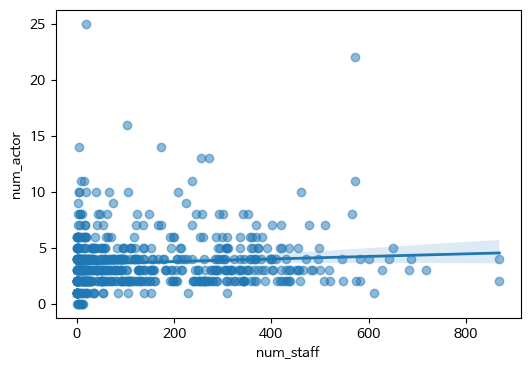

In [21]:
x, y = 'num_staff', 'num_actor'

# 산점도 + 회귀선
fig, ax = plt.subplots(figsize=(6,4))
sns.regplot(data=df, x=x, y=y, scatter_kws={'alpha':0.5}, line_kws={'linewidth':2}, ax=ax)

- 대부분의 영화는 스태프 수가 0~300명 사이에 몰려있음
- 주연 배우 수도 대체로 0~5명 정도에 집중되어 있음
- 회귀선이 거의 수평에 가까운 것으로 보아 스태프 수가 많아진다고 해서 주연 배우 수가 크게 늘어나는 것 같진 않음

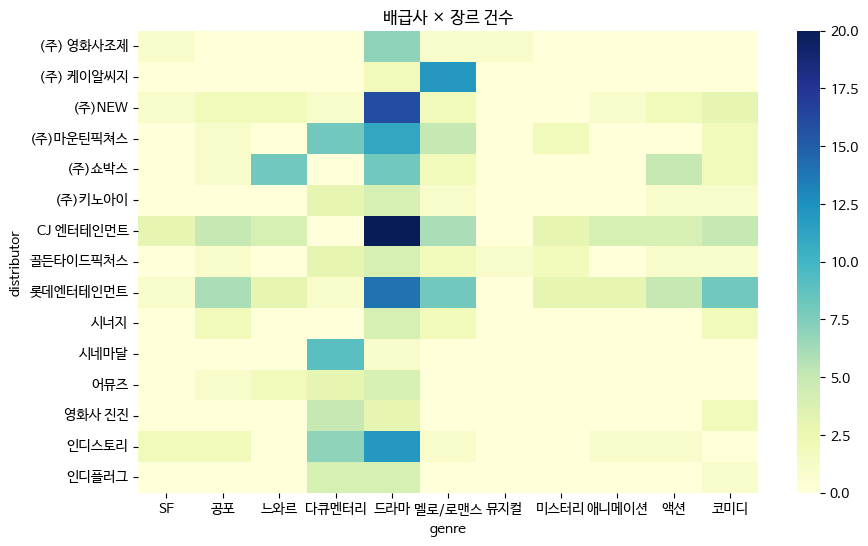

In [25]:
cat_a, cat_b = 'distributor', 'genre'
topA = df[cat_a].value_counts().head(15).index
topB = df[cat_b].value_counts().head(12).index

# 교차표
pv = pd.crosstab(df[cat_a].where(df[cat_a].isin(topA)),
                 df[cat_b].where(df[cat_b].isin(topB)))

# 히트맵
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(pv, cmap="YlGnBu", annot=False, ax=ax)
ax.set_title("배급사 × 장르 건수")
plt.show()

- 대부분의 배급사에서 드라마 장르를 가장 많이 배급하는 것으로 보임
- CJ 엔터테인먼트가 드라마 배급 건수가 가장 많음

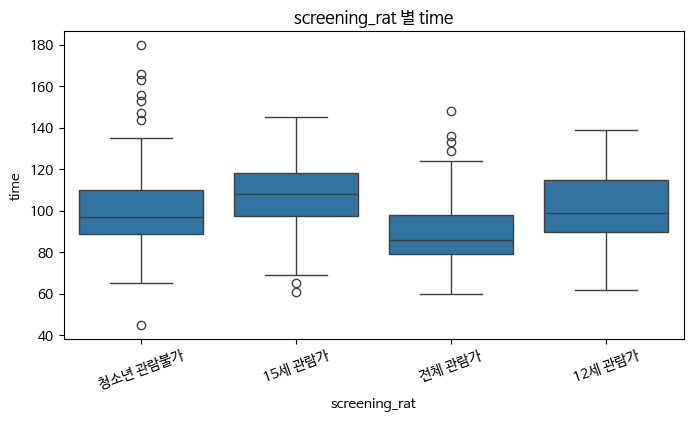

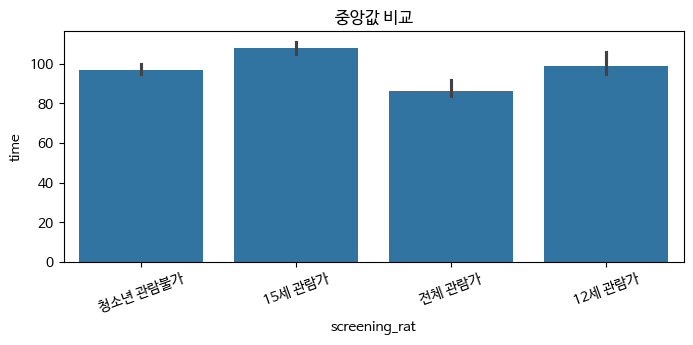

In [28]:
cat_col, num_col = 'screening_rat', 'time'

# 박스플롯으로 분포 비교
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(data=df, x=cat_col, y=num_col, ax=ax)
ax.set_title(f"{cat_col} 별 {num_col}")
plt.xticks(rotation=20)
plt.show()

# 중앙값 비교
fig, ax = plt.subplots(figsize=(8,3))
sns.barplot(data=df, x=cat_col, y=num_col, estimator=np.median, ax=ax)
ax.set_title("중앙값 비교")
plt.xticks(rotation=20)
plt.show()


- 관람등급이 낮을수록(전체 관람가) 영화 시간이 짧아짐
- 관람등급이 높아질수록(15세, 청불) 영화 시간이 길어지는 경향이 있음
- 특히 15세 관람가 영화가 평균적으로 가장 긴 러닝타임을 가지며, 전체 관람가는 짧고 일정한 분포를 보임
- 다만, 청소년 관람불가 영화는 편차가 크고 긴 영화도 많아 분포가 넓음

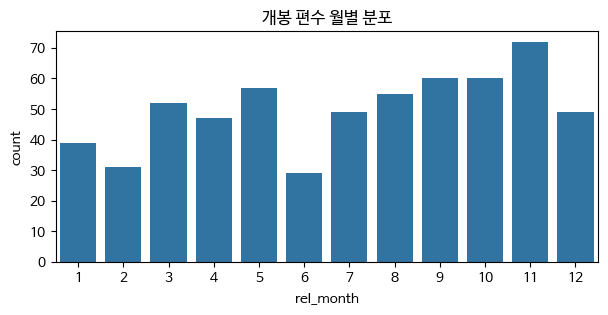

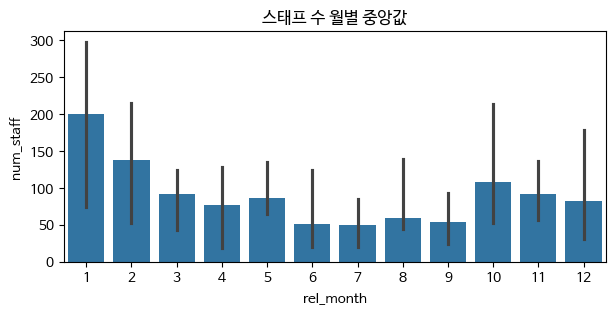

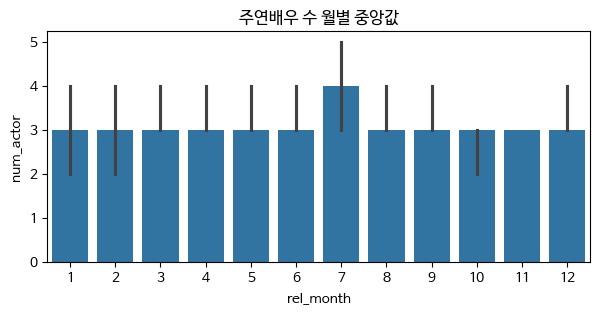

In [30]:
# 월별 개봉 편수
fig, ax = plt.subplots(figsize=(7,3))
sns.countplot(data=df, x='rel_month', ax=ax)
ax.set_title("개봉 편수 월별 분포")
plt.show()

# 월별 중앙값: 스태프 수/주연배우 수
fig, ax = plt.subplots(figsize=(7,3))
sns.barplot(data=df, x='rel_month', y='num_staff', estimator=np.median, ax=ax)
ax.set_title("스태프 수 월별 중앙값")
plt.show()

fig, ax = plt.subplots(figsize=(7,3))
sns.barplot(data=df, x='rel_month', y='num_actor', estimator=np.median, ax=ax)
ax.set_title("주연배우 수 월별 중앙값")
plt.show()

- 연말(특히 11월)은 영화 개봉이 가장 활발하고, 여름 방학 시즌(7,8월)보다는 오히려 가을, 겨울 개봉이 많음
- 이는 한국 영화 산업에서 대작 개봉이 연말에 집중되는 경향을 보여줌
- 상반기 초반(1월)과 하반기 말(10~12월)에 스태프가 많은 대작 개봉이 집중됨
- 주연 배우 수는 월별로 큰 변동이 없고 안정적
- 즉 영화 제작 규모나 개봉 시즌과 상관없이 주연 배우 수는 비슷한 수준이나, 여름만 소폭 증가

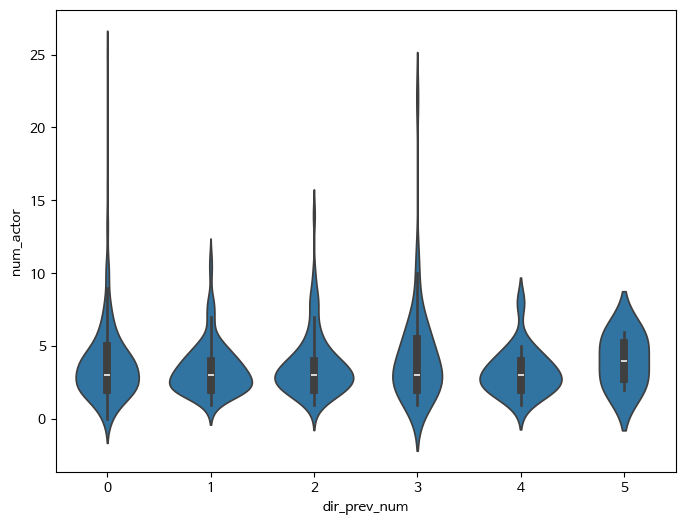

In [37]:
x, y = 'dir_prev_num', 'num_actor'

# 바이올릿 플롯
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(data=df, x='dir_prev_num', y='num_actor')
plt.show()

- 대부분의 경우 주연 배우 수는 2~4명 사이에 집중되어 있음
- 감독의 경력(dir_prev_num)이 늘어나도 분포의 중심은 거의 변하지 않음 > 경력과 배우 수의 뚜렷한 상관관계는 없음
- 경력 없는 감독(0편) → 배우 수 편차가 매우 큼
- 경력 많은 감독(5편) → 배우 수가 평균적으로 조금 더 많고 안정적
- 전체적으로는 감독 경력과 주연 배우 수의 강한 관계는 없는 것처럼 보임
- 하지만 극단값을 보면, 오히려 신인 감독의 영화에서 다양한 배우 수가 나타난다는 특징이 있음

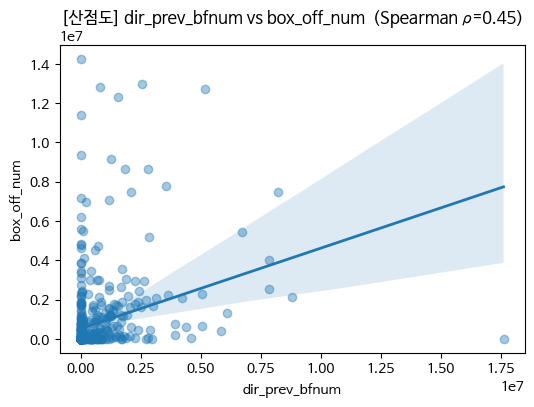

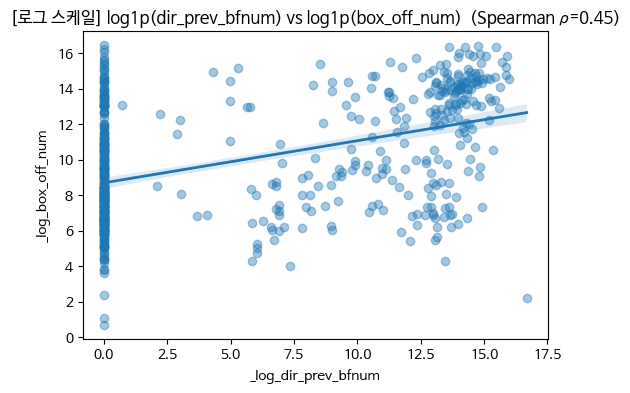

In [38]:
#### 관계 보고싶었는데 이건 코드 못 짜겠어서 챗 GPT가 해준 거에오,,ㅎ핳

x, y = 'dir_prev_bfnum', 'box_off_num'

# 원본 스케일 산점도 + 회귀선
fig, ax = plt.subplots(figsize=(6,4))
sns.regplot(data=df, x=x, y=y, scatter_kws={'alpha':0.4}, line_kws={'linewidth':2}, ax=ax)
rho = df[[x,y]].dropna().corr(method='spearman').iloc[0,1]
ax.set_title(f"[산점도] {x} vs {y}  (Spearman ρ={rho:.2f})")
plt.show()

# 긴 꼬리 보정: log1p 스케일로 재시각화
df['_log_'+x] = np.log1p(df[x].clip(lower=0))
df['_log_'+y] = np.log1p(df[y].clip(lower=0))

fig, ax = plt.subplots(figsize=(6,4))
sns.regplot(data=df, x='_log_'+x, y='_log_'+y, scatter_kws={'alpha':0.4}, line_kws={'linewidth':2}, ax=ax)
rho_log = df[['_log_'+x, '_log_'+y]].dropna().corr(method='spearman').iloc[0,1]
ax.set_title(f"[로그 스케일] log1p({x}) vs log1p({y})  (Spearman ρ={rho_log:.2f})")
plt.show()


- 극단적으로 큰 값들이 있어서, 대부분 데이터가 0~200만 구간 왼쪽 아래에 몰려 있음
- 상관계수 Spearman ρ = 0.45 → 중간 정도의 양의 상관관계
- 즉, 이전 흥행 성적이 좋았던 감독일수록 새로운 영화의 관객 수도 많은 경향이 보이지만, 큰 값들이 전체 그래프를 왜곡하고 있음
- 따라서, 실제로는 일부 대형 흥행작이 관계를 이끌고 있는 가능성이 큼
- 로그 변환으로 인해 작은 값과 큰 값 간의 격차가 줄어들게 함
- 대부분의 데이터가 고르게 퍼져 분포를 확인하기 쉬워짐
- 여전히 Spearman ρ = 0.45 → 상관관계의 크기는 동일하지만, 대부분 영화에서 양의 관계가 보다 선명하게 보임
- 중간 규모 흥행작들의 패턴이 드러나서, “이전 성적이 좋으면 이후에도 평균적으로 더 좋은 성적”이라는 경향이 더 명확해짐